## Business Goal

Build a prediction model to predict whether a movie is going to perform well on our platform (cvt_per_day) based on the information in the dataset.

## Load packages

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import war nings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

plt.style.use('ggplot') 
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 5)})

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings('ignore')

## Load data

* 'Video_id' is defined as the index of each sample. 
* 'cvt_per_day' is the metric
* the rest of 14 columns are all characteristic features (numeric & categorical) of each video.

In [2]:
pv = pd.read_csv('/Users/shuangxu/Documents/Data Set/TVdata.txt', sep = ',', header=0, lineterminator = '\n')

# Part 1 : Data Exploration

In [3]:
pv.head(3)

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.606,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.500,112.301,51,other award,PG-13,1.710
1,300175,270338.426,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.500,94.983,41,no award,R,3.250
2,361899,256165.867,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.300,115.764,58,other award,R,2.647


In [4]:
pv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
video_id                         4226 non-null int64
cvt_per_day                      4226 non-null float64
weighted_categorical_position    4226 non-null int64
weighted_horizontal_poition      4226 non-null int64
import_id                        4226 non-null object
release_year                     4226 non-null int64
genres                           4226 non-null object
imdb_votes                       4226 non-null int64
budget                           4226 non-null int64
boxoffice                        4226 non-null int64
imdb_rating                      4226 non-null float64
duration_in_mins                 4226 non-null float64
metacritic_score                 4226 non-null int64
awards                           4226 non-null object
mpaa                             4226 non-null object
star_category                    4226 non-null float64
dtypes: float64(4), int64(8), obj

In [5]:
print('For this data set:')
print('Number of rows: ' + str(pv.shape[0])) 
print('Number of columns: ' + str(pv.shape[1]))

For this data set:
Number of rows: 4226
Number of columns: 16


## 1.1 Check duplicated entry

* Each video should only appear once in the list.
* Duplicated video will be removed.

In [6]:
if len(pv.set_index('video_id').index.get_duplicates()) == 0:
    print ('There is no duplicated entry based on video ID.')

There is no duplicated entry based on video ID.


## 1.2 Understand the numerical features

### 1.2.1 Overview

In [7]:
pv.drop(['video_id', 'release_year'],axis=1).describe(include = np.number)

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000
mean,4218.630,7.783,28.104,6462.924,2150743.439,2536338.472,5.257,89.556,15.974,0.955
std,13036.080,6.134,11.864,31596.007,7176604.483,8243516.266,2.123,21.086,26.205,0.955
min,2.188,1.000,1.000,0.000,0.000,0.000,0.000,4.037,0.000,0.000
25%,351.169,4.000,20.000,81.000,0.000,0.000,4.300,82.602,0.000,0.000
50%,1193.500,6.000,28.000,535.000,0.000,0.000,5.800,90.730,0.000,1.000
75%,3356.789,9.000,36.000,3053.000,1500000.000,0.000,6.800,99.500,41.000,1.667
max,307127.606,41.000,70.000,948630.000,107000000.000,184208848.000,10.000,246.017,100.000,4.000


### 1.2.2 Missing Values

In [8]:
# Check the percentage of values that are equal to 0 
(pv==0).sum()/pv['video_id'].count()

video_id                        0.000
cvt_per_day                     0.000
weighted_categorical_position   0.000
weighted_horizontal_poition     0.000
import_id                       0.000
release_year                    0.000
genres                          0.000
imdb_votes                      0.081
budget                          0.581
boxoffice                       0.756
imdb_rating                     0.081
duration_in_mins                0.000
metacritic_score                0.713
awards                          0.000
mpaa                            0.000
star_category                   0.437
dtype: float64

* Among the 10 numerical features (excluding video_id and release_year), 
* 4 features have over 25% of missing data: budget, boxoffice, metacritic_score, star_category. 
* 2 features have less than 10% of missing data: imdb_votes, imdb_rating.

Informative missing

Non-informative missing 

### 1.2.3 Histogram for each numeric feature

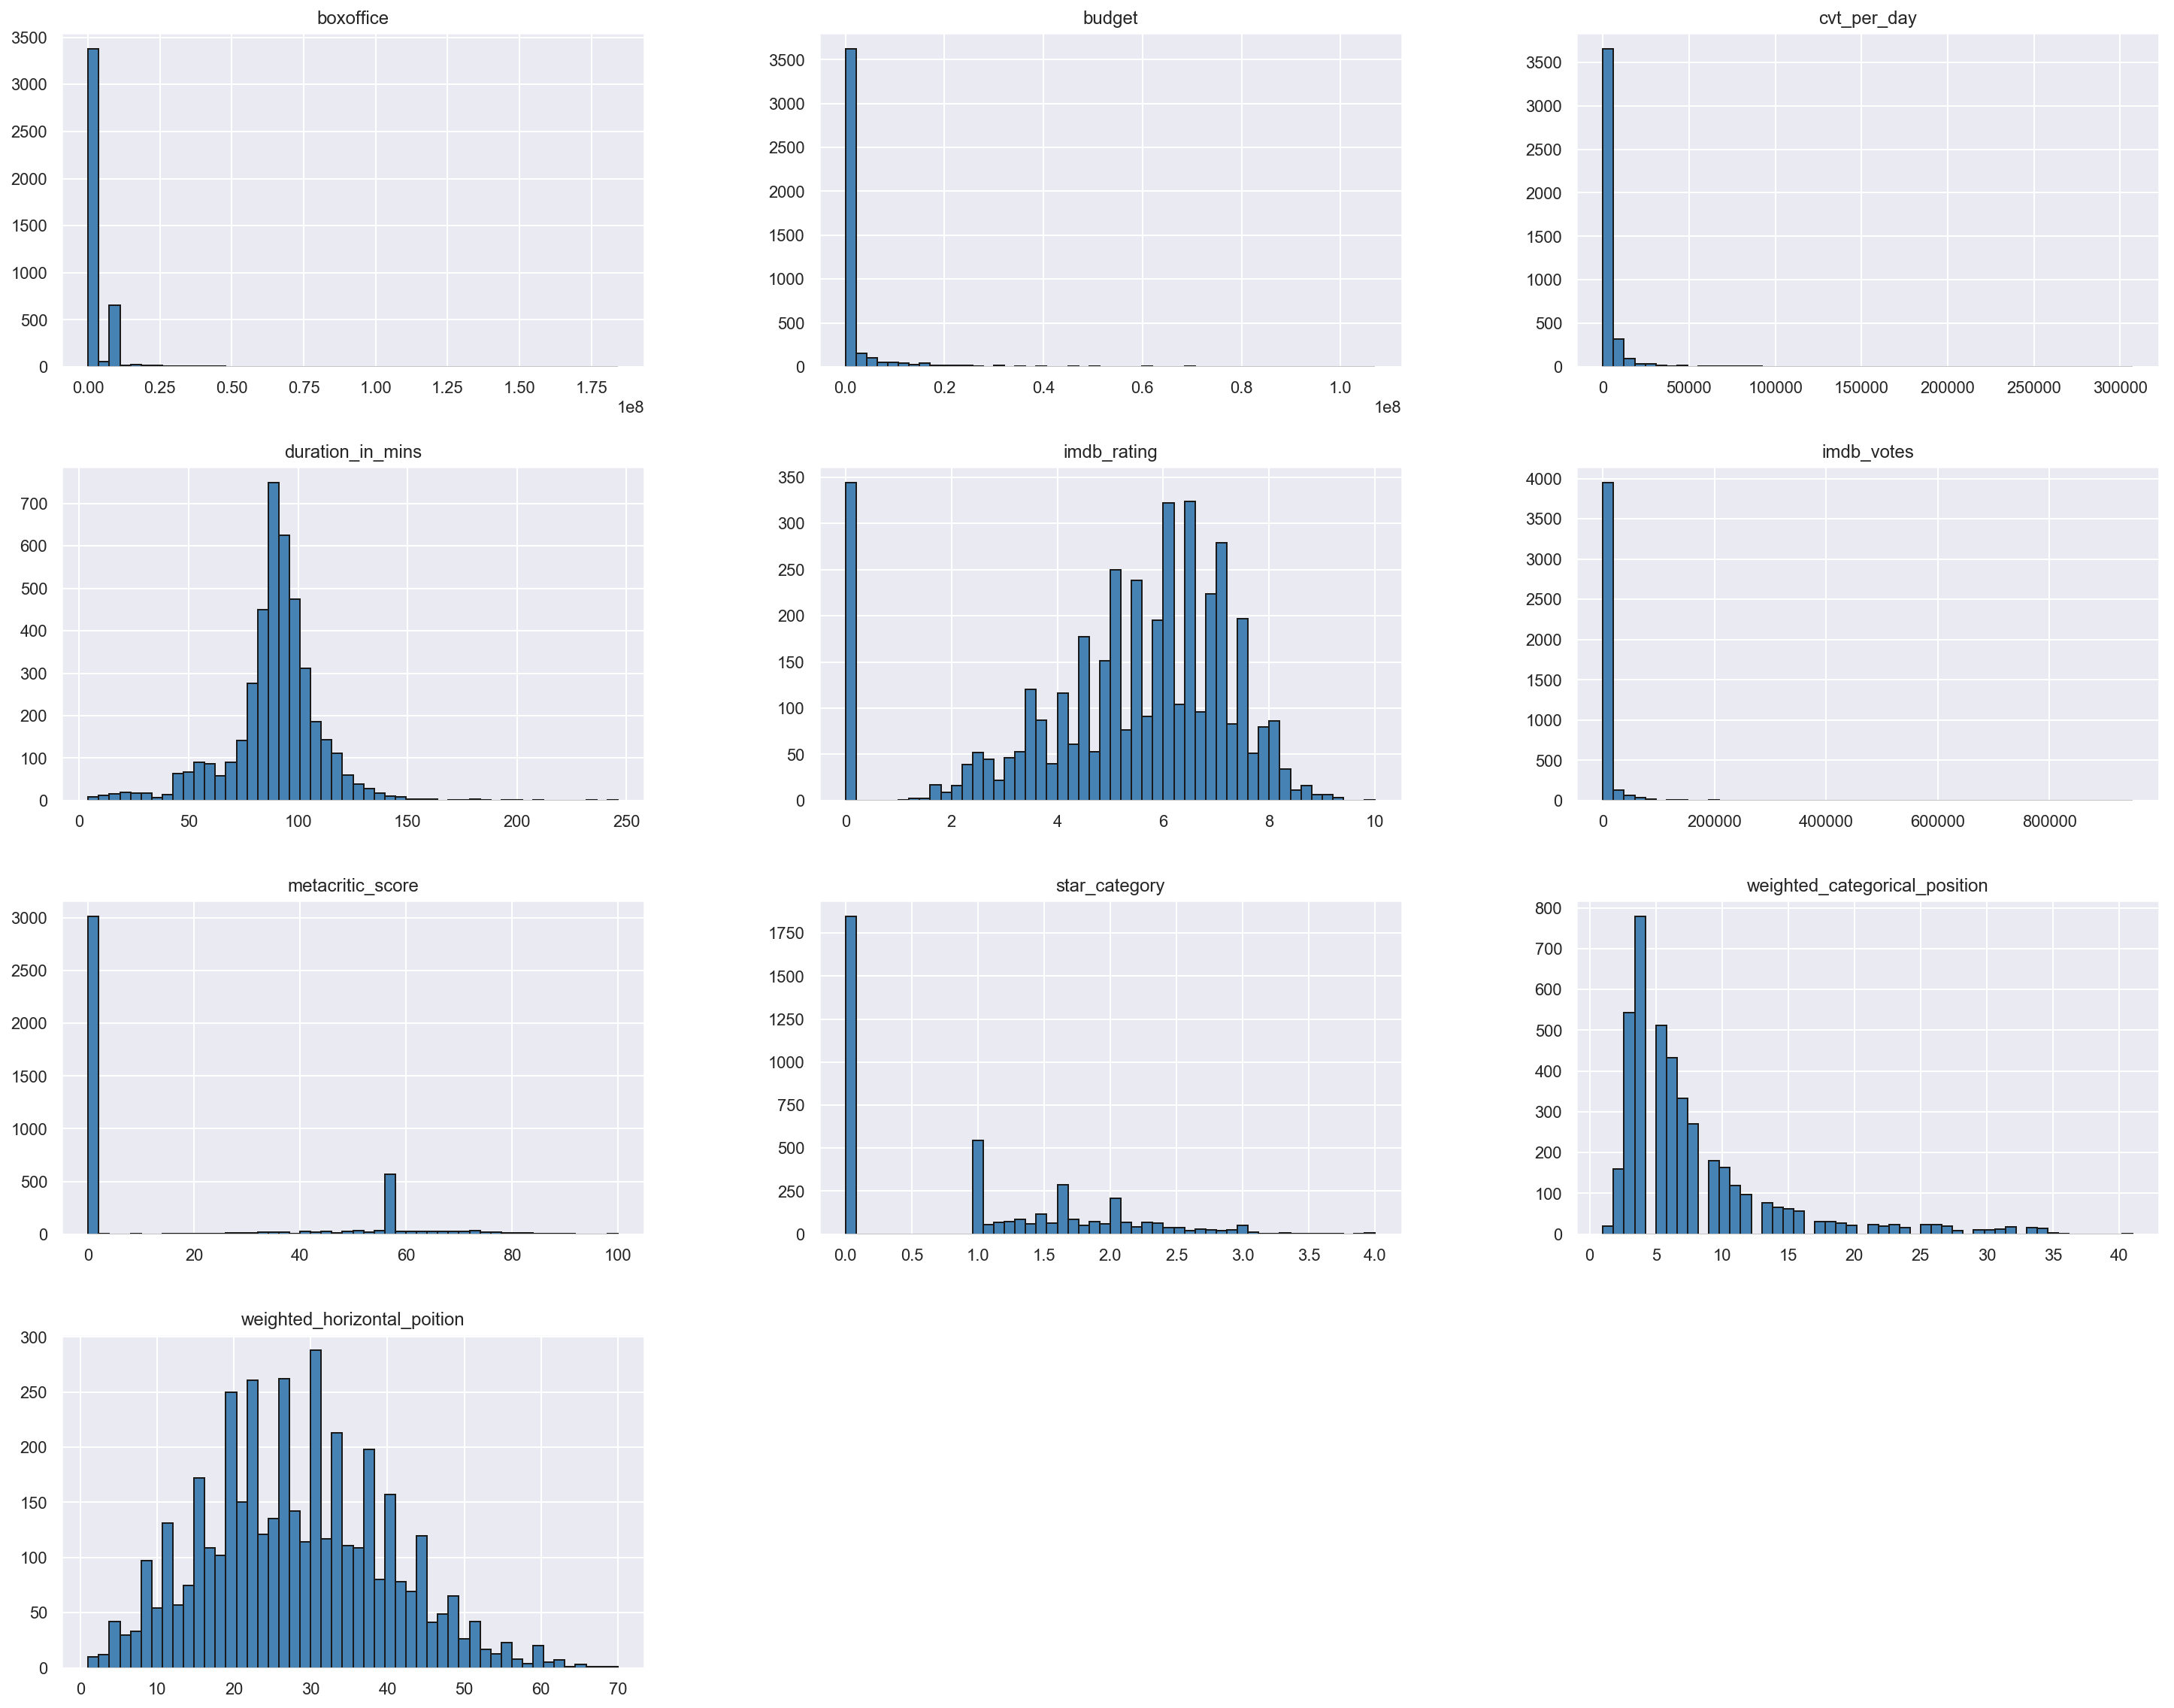

In [9]:
pv_num = pv.select_dtypes(include=[np.number]).drop(['video_id', 'release_year'],axis=1)
pv_num.hist(bins=50, figsize=(25,20),color='steelblue', ec='k')
plt.show()

### 1.2.3 cvt_per_day feature

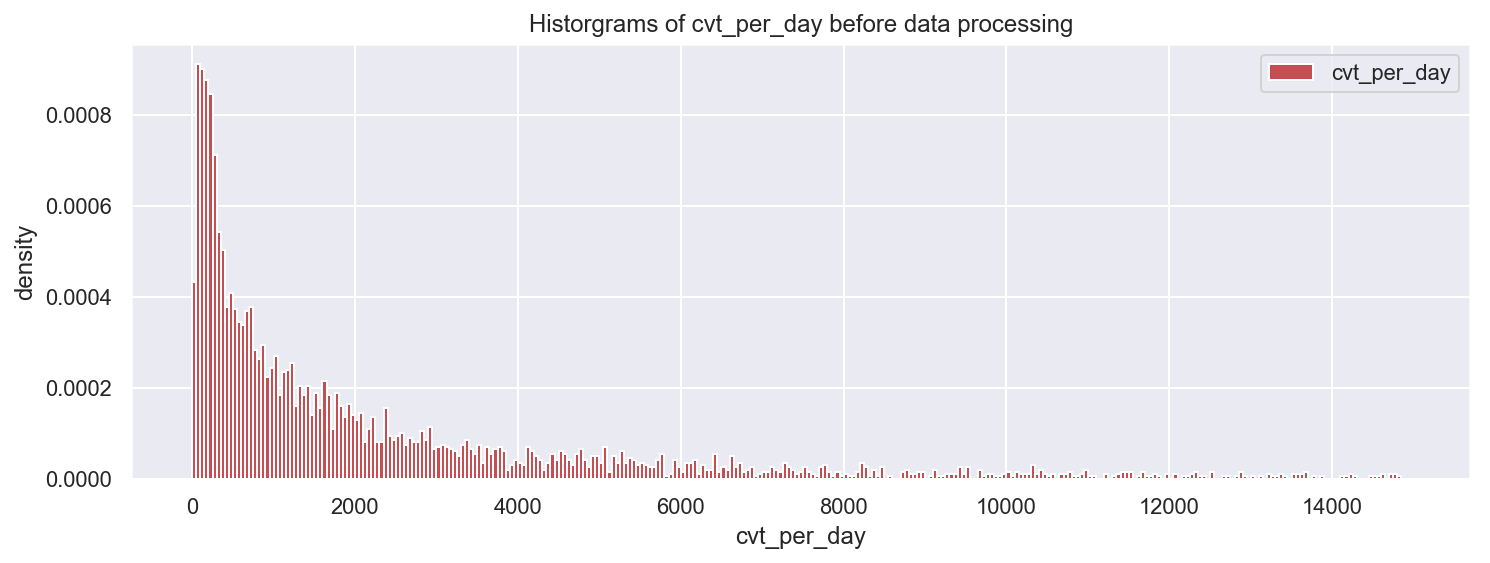

In [10]:
# cvt_per_day data explore
sns.set(rc={'figure.figsize':(12, 4)})

plt.hist(pv['cvt_per_day'].values, bins = range(0,15000, 50), alpha = 1, 
         color='r', label = 'cvt_per_day', normed = True)
plt.legend(loc ='upper right')
plt.title('Historgrams of cvt_per_day before data processing')
plt.xlabel('cvt_per_day')
plt.ylabel('density')
plt.show()

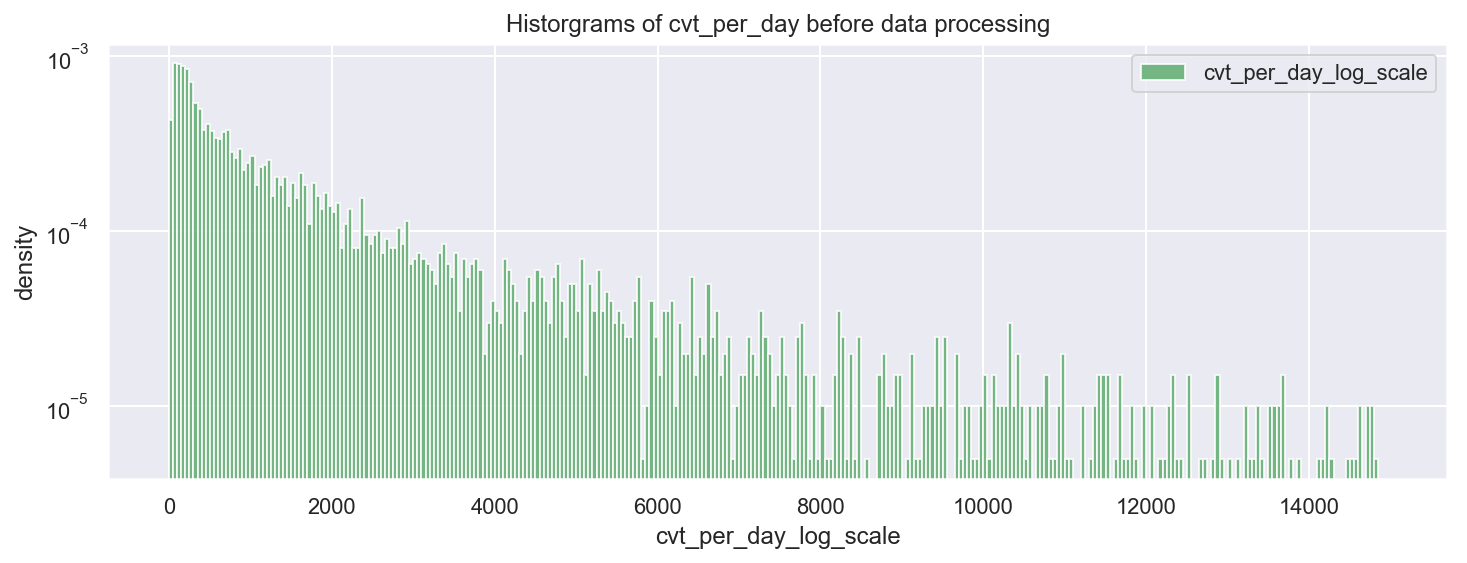

In [11]:
# log scale of y due to large variation
plt.hist(pv['cvt_per_day'].values, log = True, bins = range(0,15000, 50), alpha = 0.8, color='g', label = 'cvt_per_day_log_scale', normed = True)
plt.legend(loc ='upper right')
plt.title('Historgrams of cvt_per_day before data processing')
plt.xlabel('cvt_per_day_log_scale')
plt.ylabel('density')
plt.show()

### 1.2.3 Correlation among numerical features

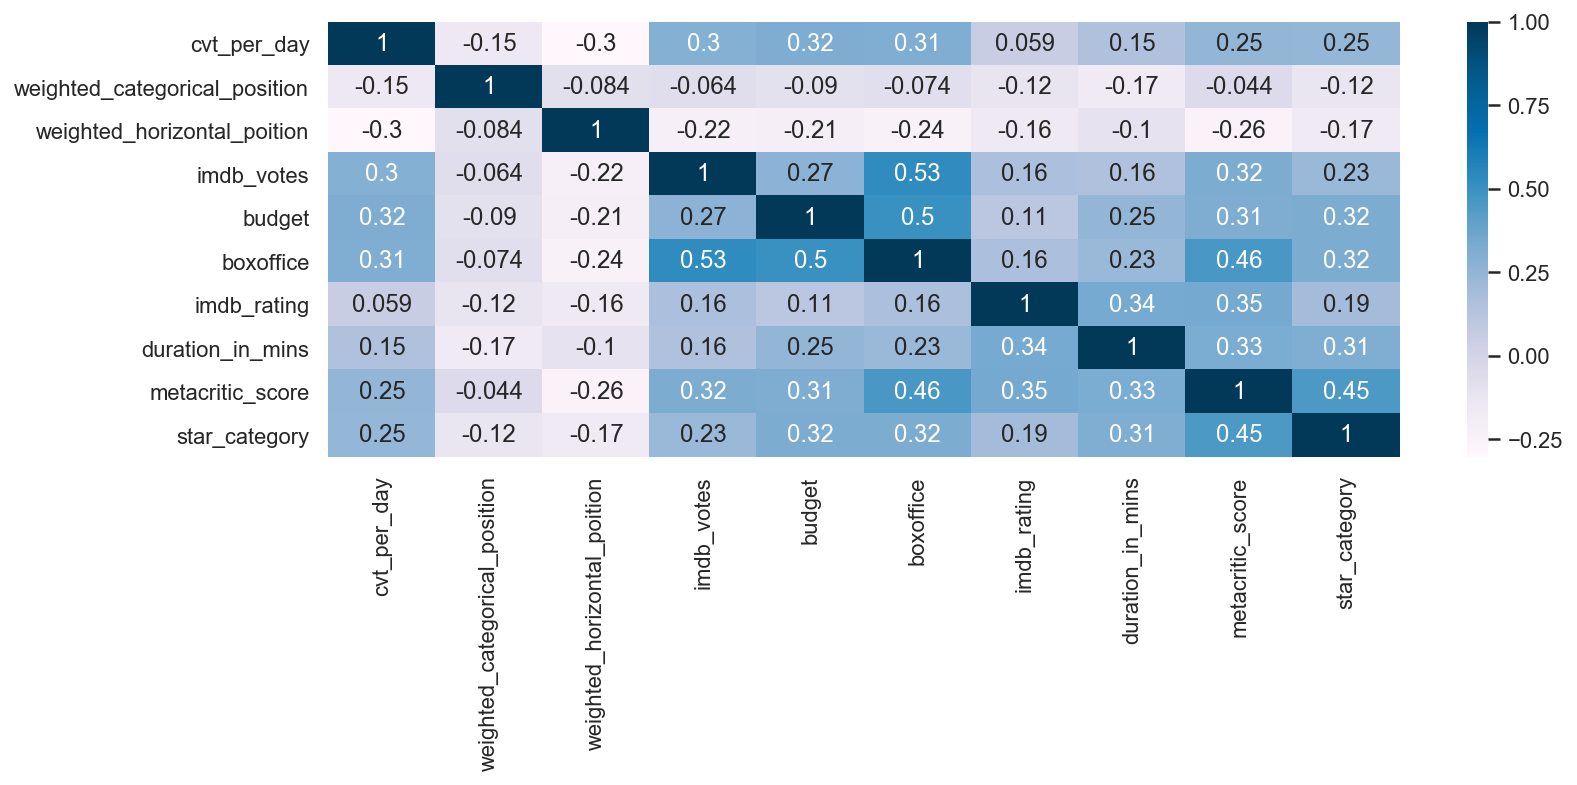

In [12]:
# correlation of the numerical features 
corr = pv_num.corr()
sns.heatmap(corr, cmap="PuBu", annot=True)

## 1.3 Understand the categorical features¶

In [13]:
pv_cag = pv.select_dtypes(exclude=[np.number])

In [14]:
pv_cag.describe()

,import_id,genres,awards,mpaa
count,4226,4226,4226,4226
unique,4,1165,5,6
top,other,Documentary,no award,NotRated
freq,2963,269,2569,2158


### 1.3.1 Simple categorical features

,index,import_id
0,other,2963
1,lionsgate,677
2,mgm,445
3,paramount,141


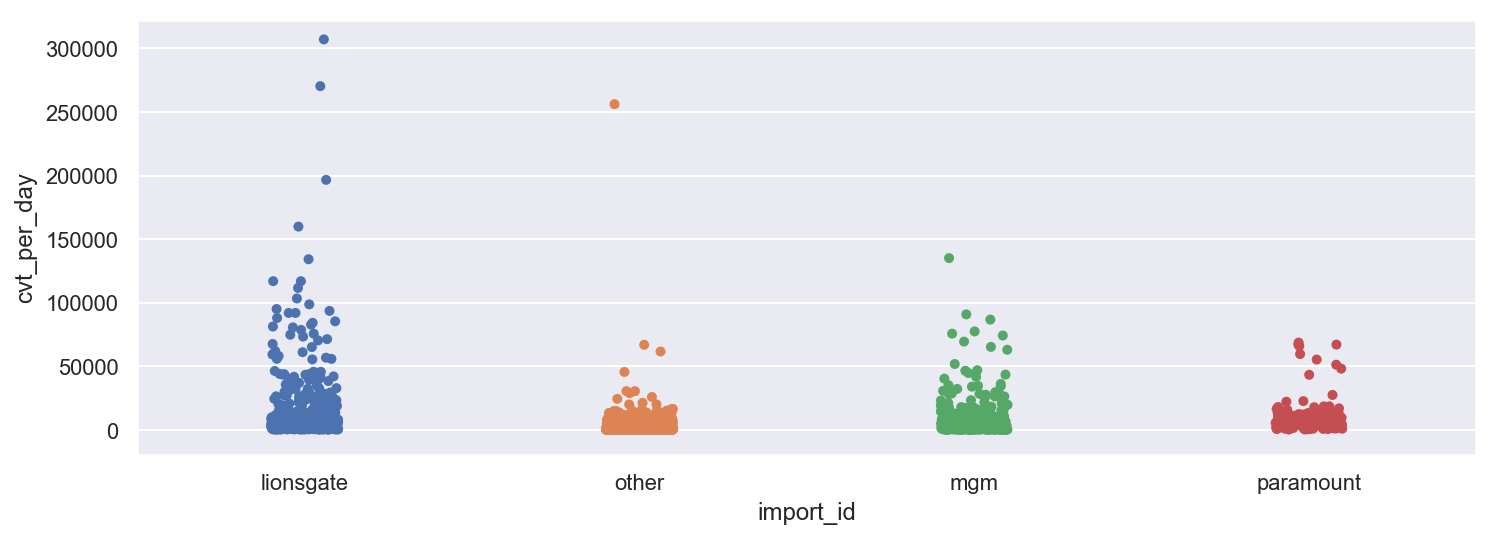

In [15]:
# For import_id
sns.stripplot(x='import_id', y='cvt_per_day', data=pv, jitter=True)
pv['import_id'].value_counts().reset_index()

,index,mpaa
0,NotRated,2158
1,R,1158
2,PG-13,426
3,PG,353
4,G,125
5,NC-17,6


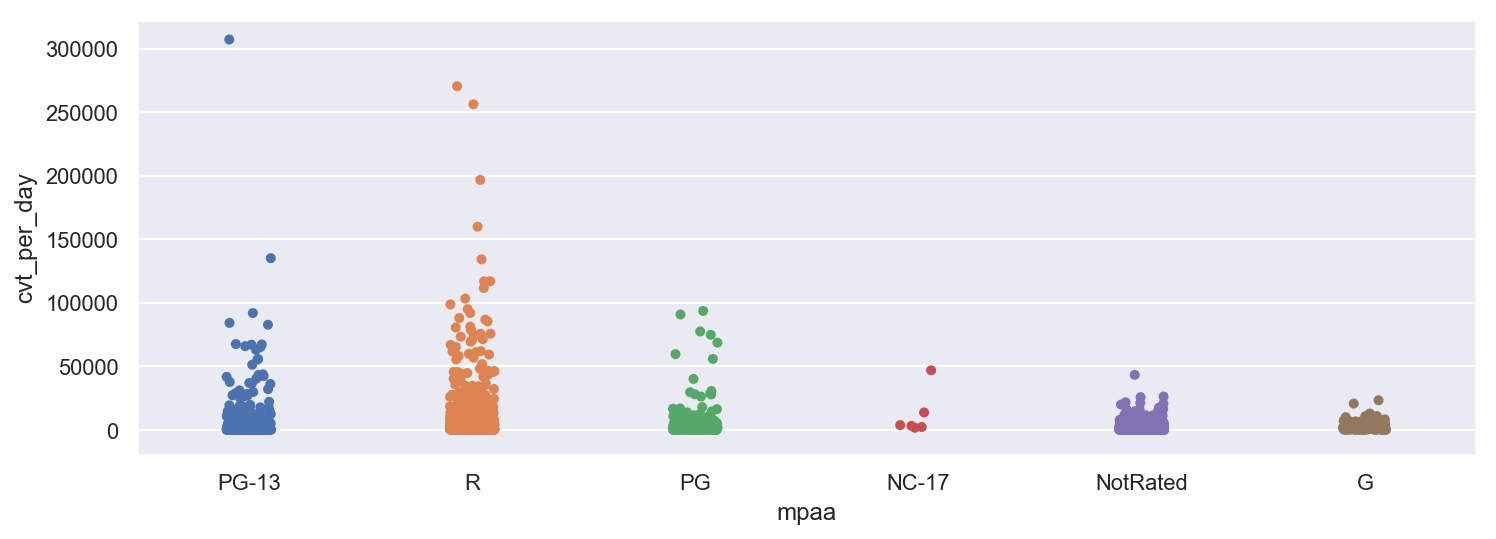

In [16]:
# For mpaa 
sns.stripplot(x='mpaa', y='cvt_per_day', data = pv, jitter=True)
pv['mpaa'].value_counts().reset_index()

,index,awards
0,no award,2569
1,other award,1453
2,Oscar,141
3,Golden Globe,44
4,BAFTA,19


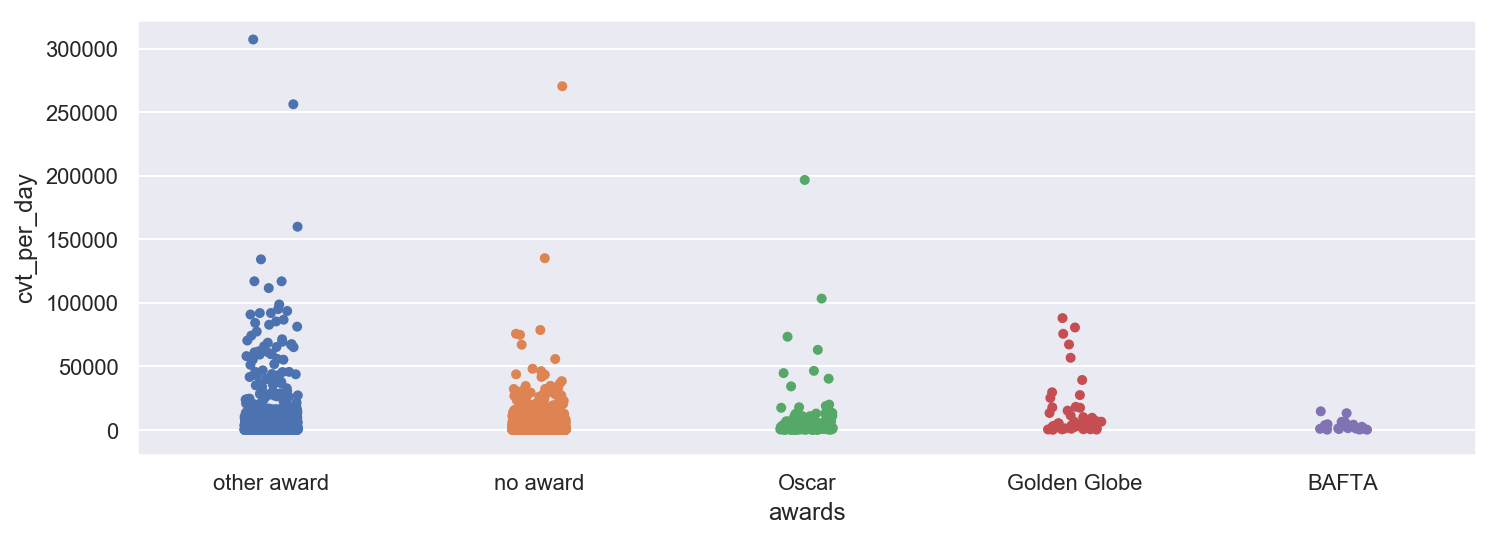

In [17]:
# For awards
sns.stripplot(x='awards', y='cvt_per_day', data=pv, jitter=True)
pv['awards'].value_counts().reset_index()

### 1.3.2 Distribution of genres

Some videos belongs to more than 1 genre, the genre of each video is splited, this would help emphasize the effect of each individual genre.

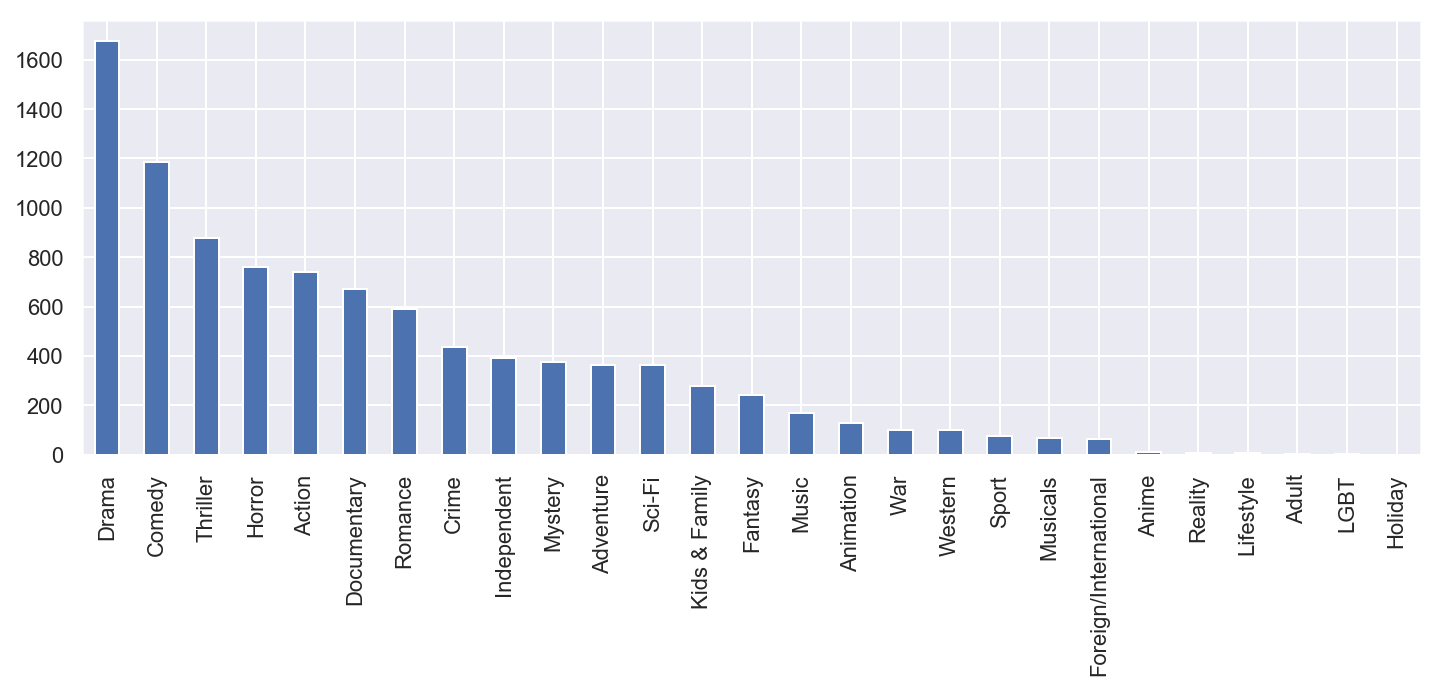

In [18]:
# split the genres in each video 
split_genres = pv['genres'].str.get_dummies(sep = ',').sum()

# plot the descending bar chart 
split_genres.sort_values(ascending = False).plot.bar()

In [27]:
d2_genres = pv['genres'].str.get_dummies(sep = ',')

* Six genres including Anime, Reality, Lifestyle, Adult, LGBT, Holiday have very low frequencies. 
* Therefore, during feature processing, they will be grouped together as: 'Misc_gen' in the feature 'genres'.

### 1.3.3 Distribution of release_year

The release year of video varies through a wide range.
Considering the popularity of a video usually decays over time, the release_year should be bucketed based on the release_year range.

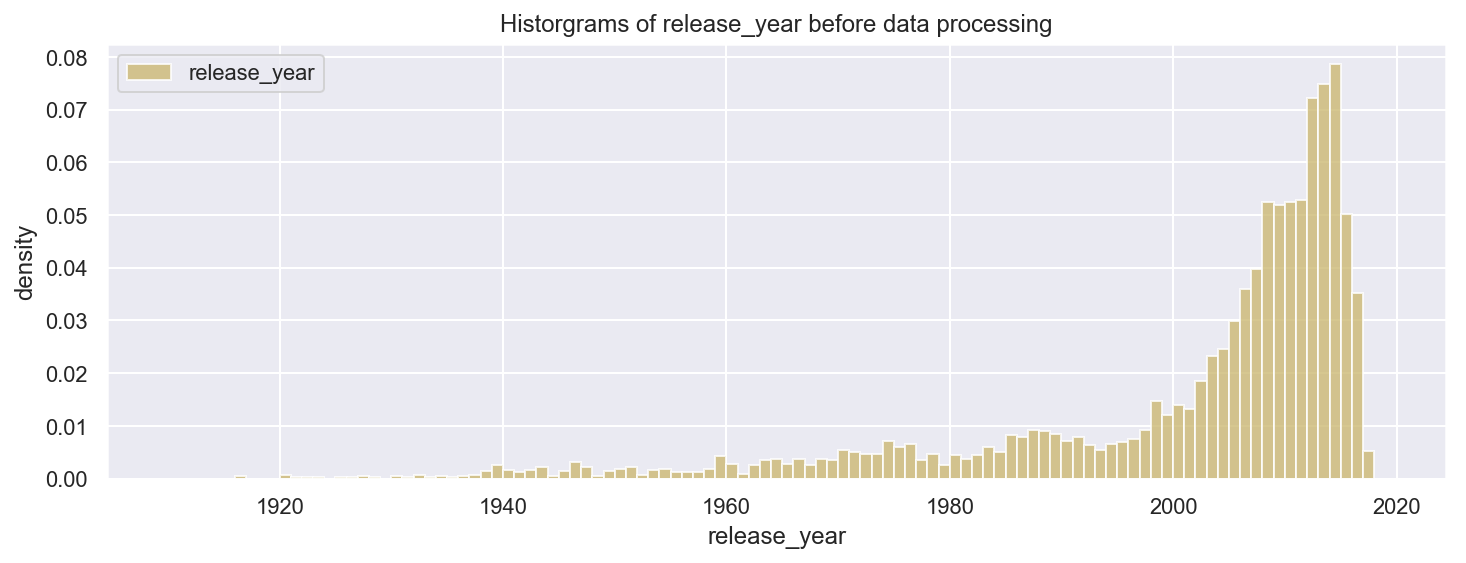

In [19]:
plt.figure(1)
plt.hist(pv['release_year'].values, bins = range(1910, 2020, 1), alpha = 0.8, color='y', label = 'release_year', normed = True)
plt.legend(loc ='upper left')
plt.title('Historgrams of release_year before data processing')
plt.xlabel('release_year')
plt.ylabel('density')
plt.show()

In [20]:
pv['release_year'].describe(percentiles = [.10, .25, .50, .75, .90])

count   4226.000
mean    2001.057
std       17.497
min     1916.000
10%     1974.000
25%     1998.000
50%     2008.000
75%     2012.000
90%     2014.000
max     2017.000
Name: release_year, dtype: float64

# Part 2: Feature Preprocessing

## 2.1 Categorical features

There are 5 categorical features: import_id, mpaa, awards, genres, and release_year.
There is no missing data in them. They can be converted into dummy/indicators.

The first 3 have relatively small sub-types, they can be easily converted to dummies.

In [21]:
# Convert the first 3 categorical variables into dummy variables
d_import_id = pd.get_dummies(pv['import_id']).astype(np.int64)
d_mpaa = pd.get_dummies(pv['mpaa']).astype(np.int64)
d_awards = pd.get_dummies(pv['awards']).astype(np.int64)

* Feature 'genres' have 27 different sub-types, 6 of them are rarely observed (Anime, Reality, Lifestyle, Adult, LGBT, Holiday). It's reasonable to group these 6 into 1. 
* Note: a video may have more than one genre. In the feature preprocessing, all genres would be handled individually.

In [33]:
# Convert 'genres' into dummy variables
d_genres = pv['genres'].str.get_dummies(sep = ',')

In [36]:
d_genres.columns

Index(['Action', 'Adult', 'Adventure', 'Animation', 'Anime', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Foreign/International', 'Holiday',
       'Horror', 'Independent', 'Kids & Family', 'LGBT', 'Lifestyle', 'Music',
       'Musicals', 'Mystery', 'Reality', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [37]:
# Combine 6 smallest genres into a new genre 'Misc_gen'. Use bitwise operation '|', then drop these 6 columns.
d_genres['Misc_genres'] = d_genres['Anime']|d_genres['Reality']|d_genres['Lifestyle']|d_genres['Adult']|d_genres['LGBT']|d_genres['Holiday']
d_genres.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1)


The release_year is bined into 10 buckets based on the year range between 1917 and 2017.

In [40]:
# bin release_year and convert into dummies
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014, 2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']

year_bin = pd.cut(pv['release_year'], bin_year, labels=year_range)

d_year = pd.get_dummies(year_bin).astype(np.int64)

In [41]:
# new dataframe, drop the previous categorical features, add new dummy variables, check for null
pv_temp = pv.drop(['import_id', 'mpaa','awards','genres', 'release_year'], axis=1)
new_pv = pd.concat([pv_temp, d_import_id, d_mpaa, d_awards, d_genres, d_year], axis=1)
new_pv.shape

(4226, 58)

In [64]:
# Check if there are any null data 
pd.isnull(new_pv).any(axis=1).nonzero()[0]

array([   9,   56,   90, ..., 4223, 4224, 4225])

In [58]:
new_pv_copy = new_pv.copy() # a copy of newTV

* Feature space holds 4226 observations and 58 features in total.
* There is NO null data. 
* newTV_0 is kepted as the raw dataframe before any further feature processing

## 2.2 Handling of missing data

Among the 10 numerical features (not include video_id), 
* 4 features have over 25% of missing values (shown as '0', which is not possible in reality): 
~ budget, boxoffice, metacritic_score, star_category. 
* 2 features have less than 10% of missing data: 
~ imdb_votes, imdb_rating.

There are 3242 samples have at least one missing data.

In [60]:
# mark zero values as NaN
new_pv[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = new_pv[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)


In [61]:
# count the number of NaN values in each column
new_pv.isnull().sum()

video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
star_category                    1846
lionsgate                           0
mgm                                 0
other                               0
paramount                           0
G                                   0
NC-17                               0
NotRated                            0
PG                                  0
PG-13                               0
R                                   0
BAFTA                               0
Golden Globe                        0
Oscar                               0
no award                            0
other award                         0
Action      

In [65]:
# count the number videos who have at least one missing data 
print('Videos having at least one null: ', new_pv.isnull().any(axis=1).sum())

Videos having at least one null:  3242


### 2.2.1 Filling missing data with mean value

For imdb_voates and imdb_rating, they always show 'null' together, which is reasonable, since when a imdb_votes is missing, the imdb_rating is mostly also missing. 

In [76]:
new_pv[['imdb_votes','imdb_rating']].isnull()

,imdb_votes,imdb_rating
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,True,True


In [77]:
# fill missing values with the column mean
new_pv_filled = new_pv.copy()
for item in ['budget','boxoffice','metacritic_score','star_category','imdb_votes','imdb_rating']:
    new_pv_filled[item].fillna(new_pv_filled[item].mean(), inplace = True)

new_pv_filled have the feature processing as: fill the missing data in budget, boxoffice, metacritic_score, star_category, imdb_votes, imdb_rating with mean. 

## 2.3 Feature scaling

In [86]:
from sklearn import preprocessing

#Standard scaling
scale_list = ['weighted_categorical_position',
       'weighted_horizontal_poition', 'imdb_votes', 'budget', 'boxoffice',
       'imdb_rating', 'duration_in_mins', 'metacritic_score', 'star_category']

new_pv_scale = new_pv_filled.copy()

scale = preprocessing.StandardScaler().fit(new_pv_scale[scale_list])

new_pv_scale[scale_list] = scale.transform(new_pv_scale[scale_list])
## Perform standardization by centering and scaling

new_pv_scale.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,-1.106,-2.116,1.984,1.470,4.696,0.542,1.079,-0.630,...,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,-1.106,-2.116,1.258,1.470,-1.022,0.542,0.257,-1.997,...,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,-1.106,-2.116,6.043,3.108,3.898,1.100,1.243,0.327,...,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,-0.780,-2.032,11.077,1.470,0.767,1.309,1.952,5.250,...,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,-1.106,-2.116,1.258,3.290,-0.265,0.472,0.758,-2.544,...,0,0,0,0,0,0,0,1,0,0


# Part 3: Model Training

* 85% of the samples will be used to train all the models, 
* 15% is reserved for testing the models in next section.

In [107]:
from sklearn.model_selection import train_test_split

# The 15% test data will kept aside, they won't be seen by the models until final test/comparison.
train, test = train_test_split(new_pv_scale, test_size=0.15, random_state = 3)

train_x = train.drop(['video_id', 'cvt_per_day'], axis = 1)
test_x = test.drop(['video_id', 'cvt_per_day'], axis = 1)
train_y = train['cvt_per_day']
test_y = test['cvt_per_day']

## 3.1 Linear models

### 3.1.1 Lasso linear regression

#### 3.1.1.1 All featuers are linear

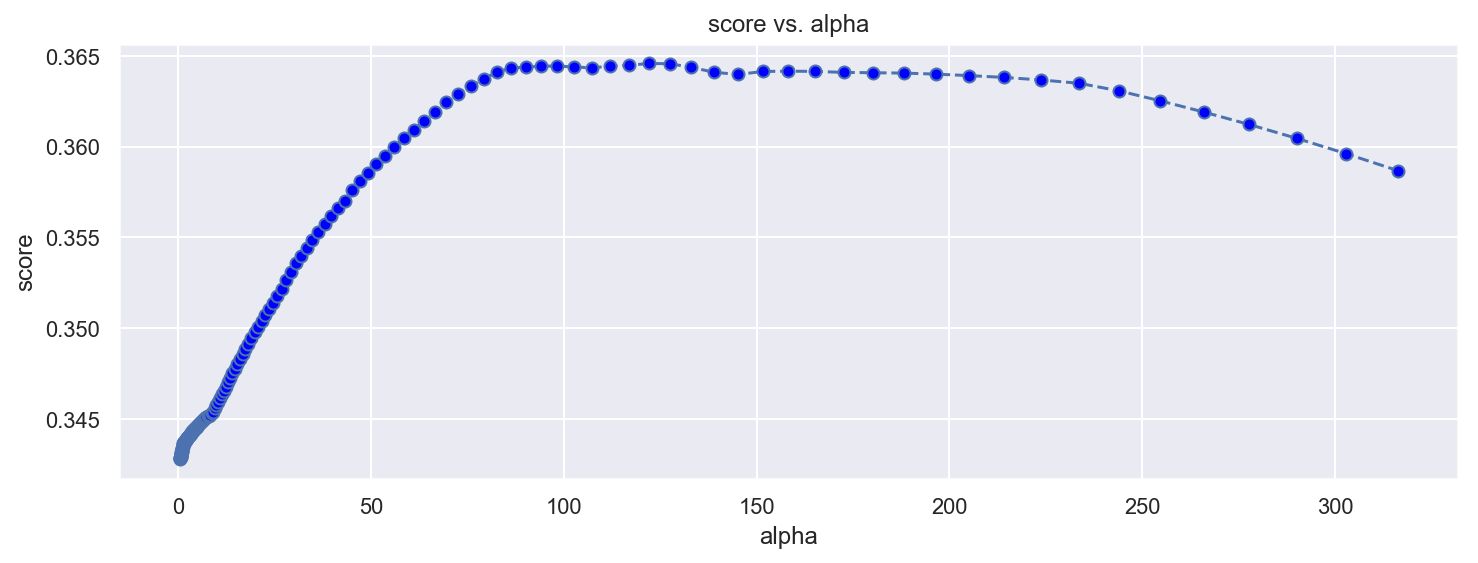

The optimized alpha and score of Lasso linear is:  122.06107238906554 0.36457853302954235


In [112]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# for finding the optimal alpha (lambda)
lr_train, lr_validate = train_test_split(train, test_size=0.15, random_state = 0)
lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

alphas = np.logspace (-0.3, 2.5, num=150) 
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')

for i, a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_x, lr_train_y) 
    scores[i] = lasso.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
        
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimized alpha and score of Lasso linear is: ', opt_a, max_score)

In [113]:
# combine the validate data and training data, use the optimal alpha, re-train the model
lasso_f = linear_model.Lasso()
lasso_f.set_params(alpha = opt_a)
lasso_f.fit(train_x, train_y)

# lasso_f is the Lasso model (linear feature), to be tested with final test data.

Lasso(alpha=122.06107238906554, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

#### 3.1.1.2 Ploynomial features

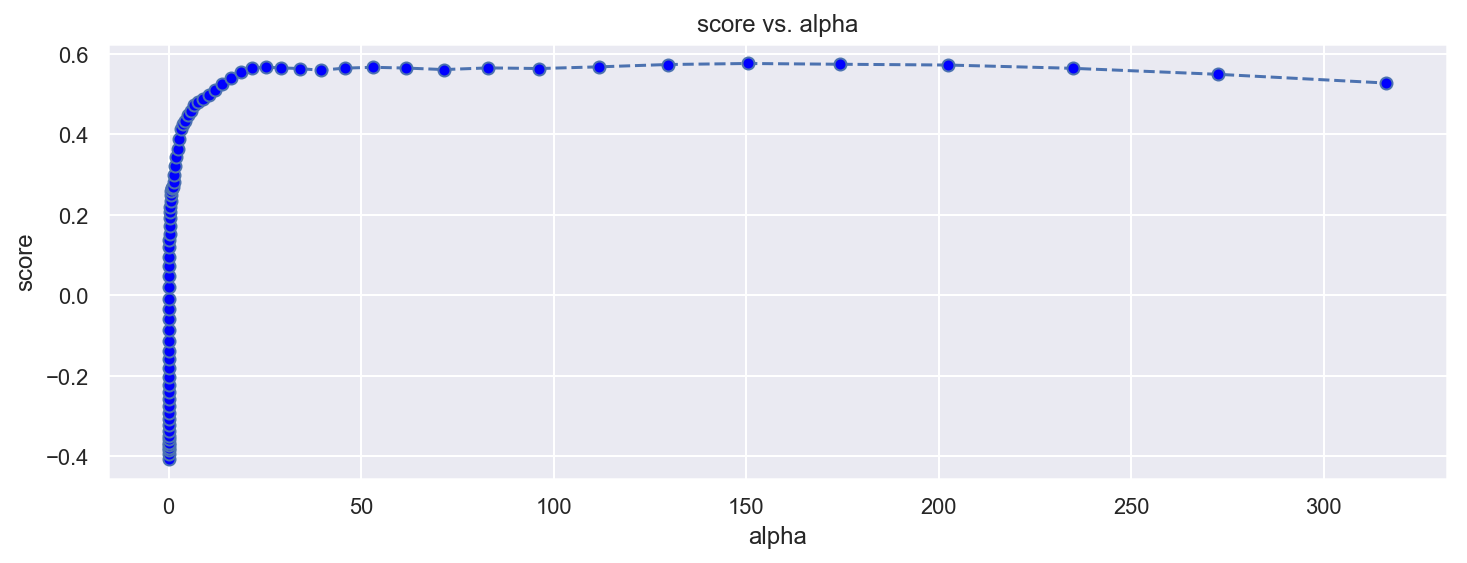

The optimized alpha and score of Lasso polynomial is:  150.38869469554086 0.5764936326091707


In [117]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2) # The degree of the polynomial features. Default = 2.

lr_train, lr_validate = train_test_split(train, test_size = 0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)

# Fit to data, then transform it.
lr_train_xp = poly.fit_transform(lr_train_x)
lr_validate_xp = poly.fit_transform(lr_validate_x)

lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

# lr_train_xp = pd.DataFrame(data=lr_train_xp, index=data[:], columns=data[0,1:]) 
alphas = np.logspace (-2.6, 2.5, num=80)

# alphas= [1]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_xp, lr_train_y)
    scores[i] = lasso.score(lr_validate_xp, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
        
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimized alpha and score of Lasso polynomial is: ', opt_a, max_score)

In [118]:
# combine the validate data and training data, use the optimal alpha, re-train the model
lr_train_xp1 = poly.fit_transform(train_x) # first poly fit_transform 

lasso_fp = linear_model.Lasso()
lasso_fp.set_params(alpha = opt_a)
lasso_fp.fit(lr_train_xp1, train_y)

# lasso_fp is the Lasso model (polynomial feature), to be tested with test data.

Lasso(alpha=150.38869469554086, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

### 3.1.2 Ridge linear regression

#### 3.1.2.1 All featuers are linear

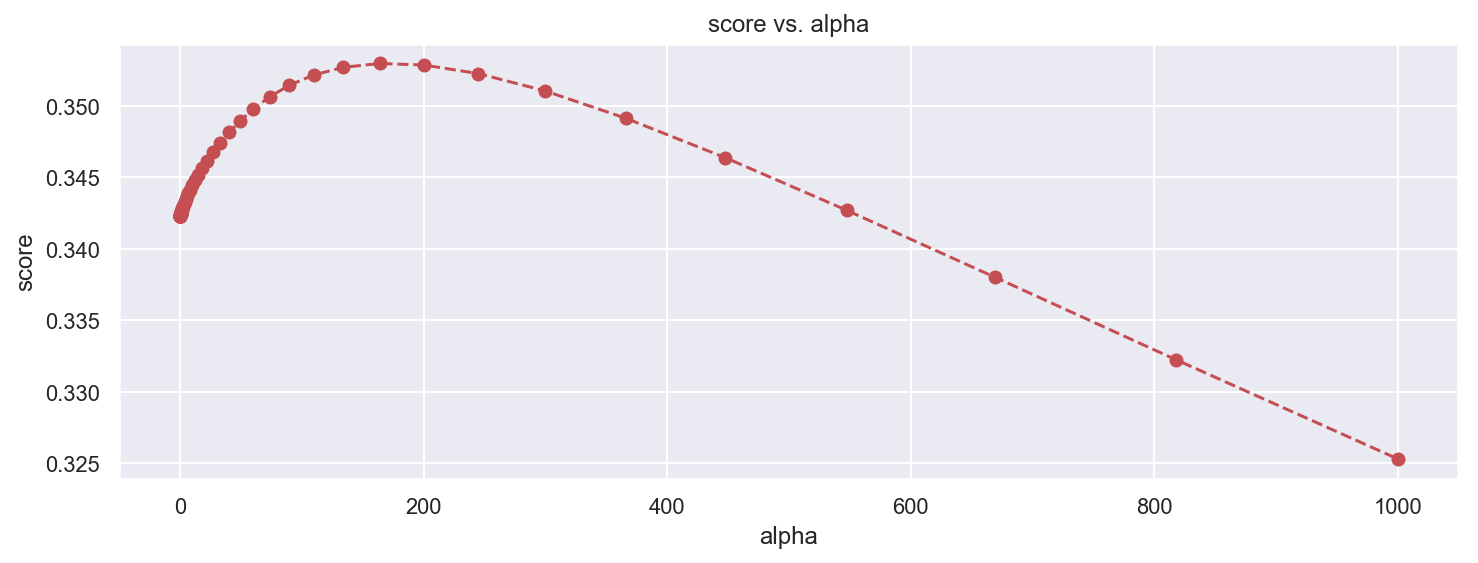

The optimized alpha and score of Ridge linear is:  163.97026580002054 0.3529604309849165


In [119]:
# Use the same training data set as Lasso (linear features)
lr_train, lr_validate = train_test_split(train, test_size=0.15, random_state = 0)

alphas = np.logspace (-10, 3, num=150)
# alphas= [0.000000001]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')

for i, a in enumerate(alphas):
    ridge = linear_model.Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_x, lr_train_y)
    scores[i] = ridge.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
        
plt.plot(alphas, scores, color='r', linestyle='dashed', marker='o',markerfacecolor='r', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimized alpha and score of Ridge linear is: ', opt_a, max_score)

In [120]:
# add the 15% validate data, use the optimal alpha, re-train the model

ridge_f = linear_model.Ridge()
ridge_f.set_params(alpha = opt_a)
ridge_f.fit(train_x, train_y)

# ridge_f is the Ridge model (linear feature), to be tested with test data.

Ridge(alpha=163.97026580002054, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

#### 3.1.2.2 Polynomial featuers

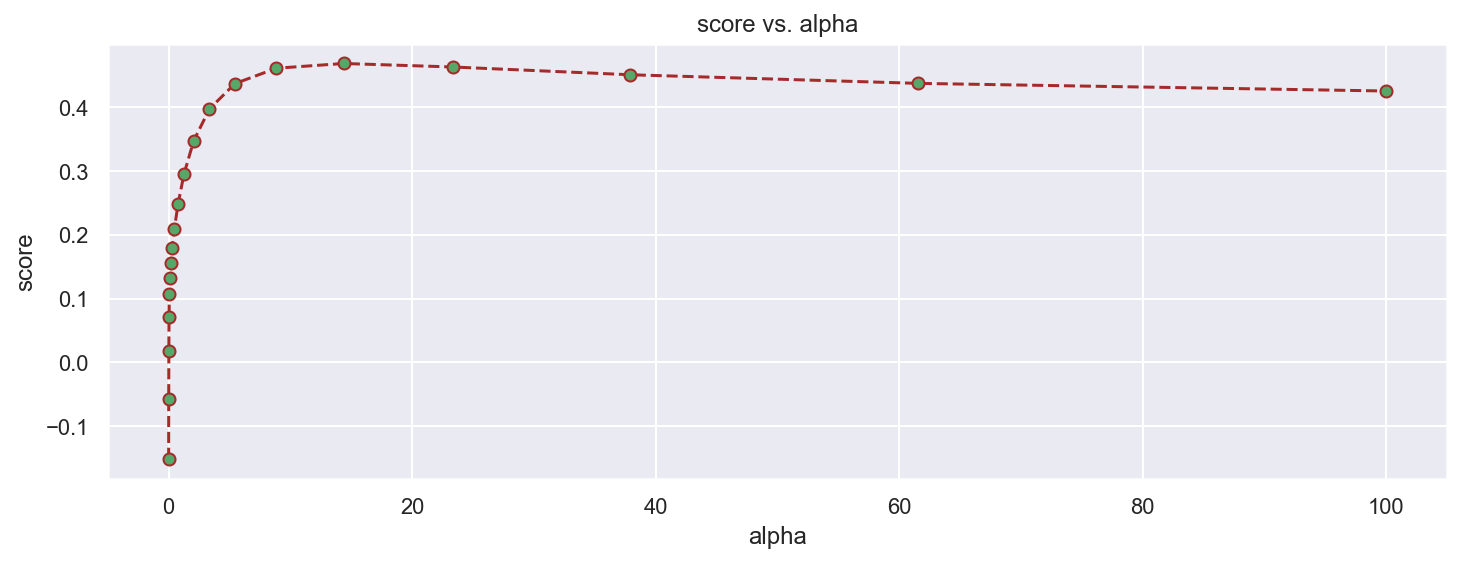

The optimized alpha and score of Ridge polynomial is:  14.38449888287663 0.4681691870019681


In [121]:
# Use the same training data set as Lasso (polynomial features)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

lr_train, lr_validate = train_test_split(train, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

lr_train_xp = poly.fit_transform(lr_train_x)
lr_validate_xp = poly.fit_transform(lr_validate_x)

alphas = np.logspace (-2, 2, num=20)
# alphas= [1]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = linear_model.Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_xp, lr_train_y)
    scores[i] = ridge.score(lr_validate_xp, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
        
plt.plot(alphas, scores, color='brown', linestyle='dashed', marker='o',markerfacecolor='g', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()

print ('The optimized alpha and score of Ridge polynomial is: ', opt_a, max_score)

In [122]:
# add the 15% validate data, use the optimal alpha, re-train the model
lr_train_xp1 = poly.fit_transform(train_x)

ridge_fp = linear_model.Ridge()
ridge_fp.set_params(alpha = opt_a)
ridge_fp.fit(lr_train_xp1, train_y)

# ridge_fp is the Ridge model (polynomial feature), to be tested with test data.

Ridge(alpha=14.38449888287663, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

## 3.2: Non-linear model

Random forest with Gridsearch cross-validation is used. 
The 'mean_scores' 
~ is used to narrow down the paramenters of n_estimator (number of trees in the forest) and Max_depth (maximum depth of the tree).

### 3.2.1 Random forest

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [124]:
rf_train, rf_test = train_test_split(train, test_size=0.15, random_state = 0)

rf_train_x = rf_train.drop(['video_id', 'cvt_per_day'], axis = 1)
rf_test_x = rf_test.drop(['video_id', 'cvt_per_day'], axis = 1)
rf_train_y = rf_train['cvt_per_day']
rf_test_y = rf_test['cvt_per_day']

param_grid = {
                 'n_estimators': [54, 55, 56, 57, 58, 59, 60, 62],
                 'max_depth': [12, 13, 14, 15, 16, 17]
             }

rf = RandomForestRegressor(random_state=2, max_features = 'sqrt')
# max_features : The number of features to consider when looking for the best split
## If “sqrt”, then max_features=sqrt(n_features)

grid_rf = GridSearchCV(rf, param_grid, cv=5)
# cv : Determines the cross-validation splitting strategy. 
## integer, to specify the number of folds in a (Stratified) KFold
grid_rf.fit(rf_train_x, rf_train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [54, 55, 56, 57, 58, 59, 60, 62], 'max_depth': [12, 13, 14, 15, 16, 17]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [125]:
grid_rf.best_params_ 
# best_params_ : Parameter setting that gave the best results on the hold out data.

{'max_depth': 14, 'n_estimators': 55}

In [126]:
grid_rf.cv_results_

{'mean_fit_time': array([0.12082825, 0.11863317, 0.11724434, 0.12925587, 0.13648462,
        0.12855945, 0.13187885, 0.150947  , 0.12884188, 0.13889756,
        0.13427267, 0.13460975, 0.14425597, 0.15719728, 0.15670142,
        0.15380425, 0.14005604, 0.13207698, 0.13339701, 0.13568163,
        0.13793774, 0.14027281, 0.14279079, 0.16258984, 0.16089997,
        0.14515419, 0.1413269 , 0.14422393, 0.14654016, 0.14845815,
        0.1509336 , 0.15588021, 0.14434576, 0.14650755, 0.14892054,
        0.15126472, 0.15382466, 0.15701938, 0.15929127, 0.18070521,
        0.15149274, 0.15318642, 0.15532184, 0.15795269, 0.16067157,
        0.16328378, 0.16658955, 0.17145038]),
 'std_fit_time': array([0.01425067, 0.00535151, 0.0008533 , 0.01452448, 0.00862322,
        0.00583934, 0.00598486, 0.02029494, 0.0065278 , 0.01353949,
        0.0077094 , 0.00370317, 0.01201346, 0.02083641, 0.0139534 ,
        0.01365688, 0.01298297, 0.00250156, 0.00053978, 0.00044604,
        0.00075469, 0.00065103, 0.000

In [127]:
scores = [x for x in grid_rf.cv_results_]
scores

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'split0_train_score',
 'split1_train_score',
 'split2_train_score',
 'split3_train_score',
 'split4_train_score',
 'mean_train_score',
 'std_train_score']

In [128]:
print(scores)

['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score']


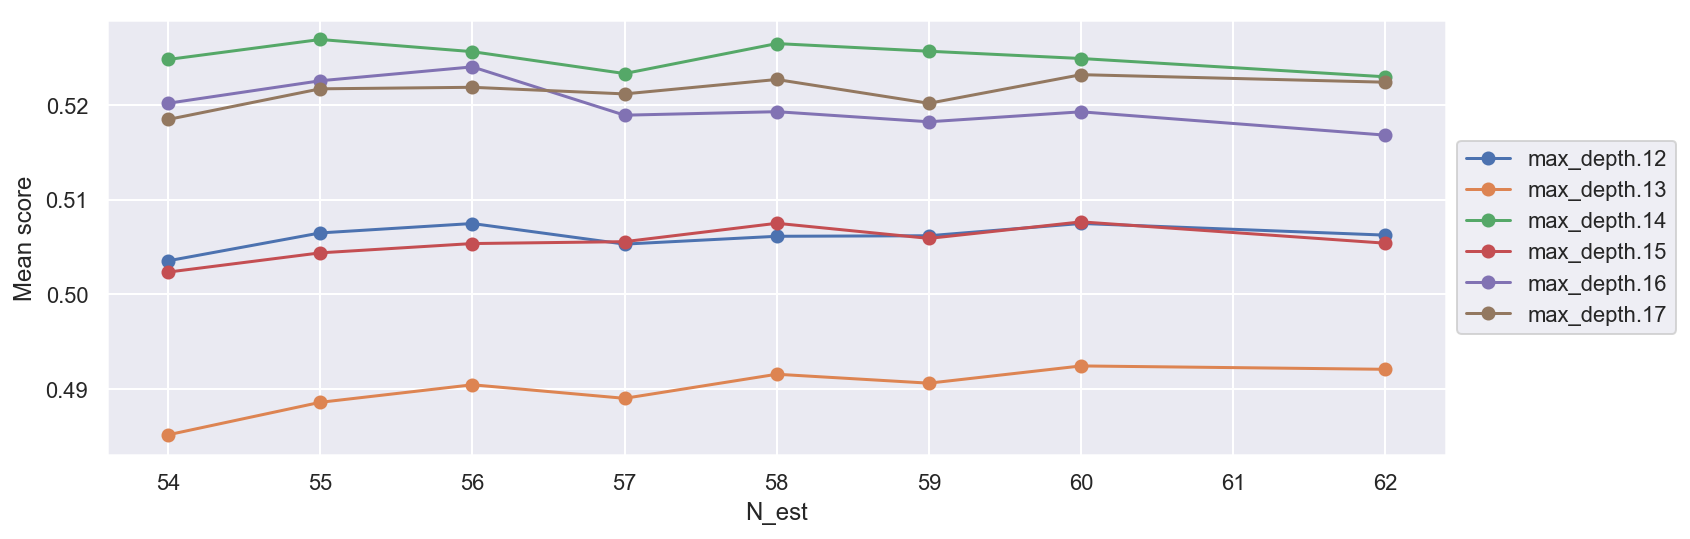

In [129]:
# plot the effect of different number of trees and maximum tree-depth druing cross validation 
scores = [x for x in grid_rf.cv_results_['mean_test_score']]
n_est = [54, 55, 56, 57, 58, 59, 60, 62]
m_depth=[12, 13, 14, 15, 16, 17]
scores = np.array(scores).reshape(len(m_depth), len(n_est))

fig = plt.figure()
ax = plt.subplot(111)
for ind, i in enumerate(m_depth):
    plt.plot(n_est, scores[ind], '-o', label='max_depth.' + str(i),)
    
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('N_est')  
plt.ylabel('Mean score')
plt.grid(True)
plt.show()
# savefig('rf_1')

In [131]:
# add both training and validation data together as the new training data
rf = RandomForestRegressor(random_state=2, max_features = 'sqrt', max_depth= 14, n_estimators=55)
rf.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=55, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

The best rf model have n_estimator = 55, and max_depth = 14.

# Part 4: Model Evaluation

Test data is the reserved 15% of the whole dataset, and has never been seen by the above models.

## 4.1 Lasso test with linear features (lasso_f)

In [132]:
# Lasso_f test (with linear features)
lasso_f_score = lasso_f.score(test_x, test_y)
pred_y = lasso_f.predict(test_x)

# The mean squared error and root mean square error
MSE_lasso_f = mean_squared_error(test_y, pred_y)
RMSE_lasso_f = sqrt(mean_squared_error(test_y, pred_y))

print ('lasso_f score: ', lasso_f_score)
print ('Mean square error of lasso_f: ', MSE_lasso_f)
print ('Root mean squared error of lasso_f:', RMSE_lasso_f)
# print ('Coefficients of lasso_f: ', lasso_f.coef_)

lasso_f score:  0.09954927178753703
Mean square error of lasso_f:  238953191.99910036
Root mean squared error of lasso_f: 15458.110880670392


## 4.2 Lasso test with polynomial features (lasso_fp)

In [134]:
# Lasso_fp test (with polynomial features)
test_xp = poly.fit_transform(test_x)
pred_y = lasso_fp.predict(test_xp)

lasso_fp_score = lasso_fp.score(test_xp, test_y)
MSE_lasso_fp = mean_squared_error(test_y, pred_y)
RMSE_lasso_fp = sqrt(mean_squared_error(test_y, pred_y))

print ('lasso_fp score: ', lasso_fp_score)
print ('Mean square error of lasso_fp: ', MSE_lasso_fp)
print ('Root mean squared error of lasso_fp:', RMSE_lasso_fp)
# print ('Coefficients of lasso_fp: ', lasso_fp.coef_)

lasso_fp score:  -0.08392274794825849
Mean square error of lasso_fp:  287641280.5138624
Root mean squared error of lasso_fp: 16959.990581184364


## 4.3 Ridge test with linear features (ridge_f)

In [135]:
# ridge_f test (with linear features)

ridge_f_score = ridge_f.score(test_x, test_y)
pred_y = ridge_f.predict(test_x)

# The mean squared error and root mean square error
MSE_ridge_f = mean_squared_error(test_y, pred_y)
RMSE_ridge_f = sqrt(mean_squared_error(test_y, pred_y))

print ('ridge_f score: ', ridge_f_score)
print ('Mean square error of ridge_f: ', MSE_ridge_f)
print ('Root mean squared error of ridge_f:', RMSE_ridge_f)
# print ('Coefficients of ridge_f: ', ridge_f.coef_)

ridge_f score:  0.11371374943726753
Mean square error of ridge_f:  235194355.40609536
Root mean squared error of ridge_f: 15336.04758098042


## 4.4 Ridge test with polynomial features (ridge_fp)

In [136]:
# ridge_fp test (with polynomial features)
test_xp = poly.fit_transform(test_x)

ridge_fp_score = ridge_fp.score(test_xp, test_y)
MSE_ridge_fp = mean_squared_error(test_y, pred_y)
RMSE_ridge_fp = sqrt(mean_squared_error(test_y, pred_y))

pred_y = ridge_fp.predict(model_test_xp)
print ('ridge_fp score: ', ridge_f_score)
print ('Mean square error of ridge_fp: ', MSE_ridge_fp)
print ('Root mean squared error of ridge_fp:', RMSE_ridge_fp)
#print ('Coefficients of ridge_fp: ', ridge_fp.coef_)

ridge_fp score:  0.11371374943726753
Mean square error of ridge_fp:  235194355.40609536
Root mean squared error of ridge_fp: 15336.04758098042


## 4.5 Random forest test (rf)

In [137]:
rf_score = rf.score(test_x, test_y)

pred_y = rf.predict(test_x)
MSE_rf = mean_squared_error(test_y, pred_y)
RMSE_rf = sqrt(mean_squared_error(test_y, pred_y))

# The mean squared error and root mean square error
print ('rf score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)
# print('Coefficients: \n', ridge_fp.coef_)

rf score:  0.5165772811589044
Mean square error of rf:  128286199.49175872
Root mean squared error of rf: 11326.349786747658


## 4.6 Comparison of the 5 models

Compared the max_score, mean squared error (MSE), and root mean squared error (RMSE) of 5 models. Random forest model rf returns the beset prediction accuracy.

In [138]:
lst_score = [lasso_f_score, lasso_fp_score, ridge_f_score, ridge_fp_score, rf_score]
MSE_lst =  [MSE_lasso_f, MSE_lasso_fp, MSE_ridge_f, MSE_ridge_fp, MSE_rf]
RMSE_lst =  [RMSE_lasso_f, RMSE_lasso_fp, RMSE_ridge_f, RMSE_ridge_fp, RMSE_rf]
model_lst = ['Lasso_linear','Lasso poly', 'Ridge linear', 'Ridge poly', 'Random forest']

No handles with labels found to put in legend.


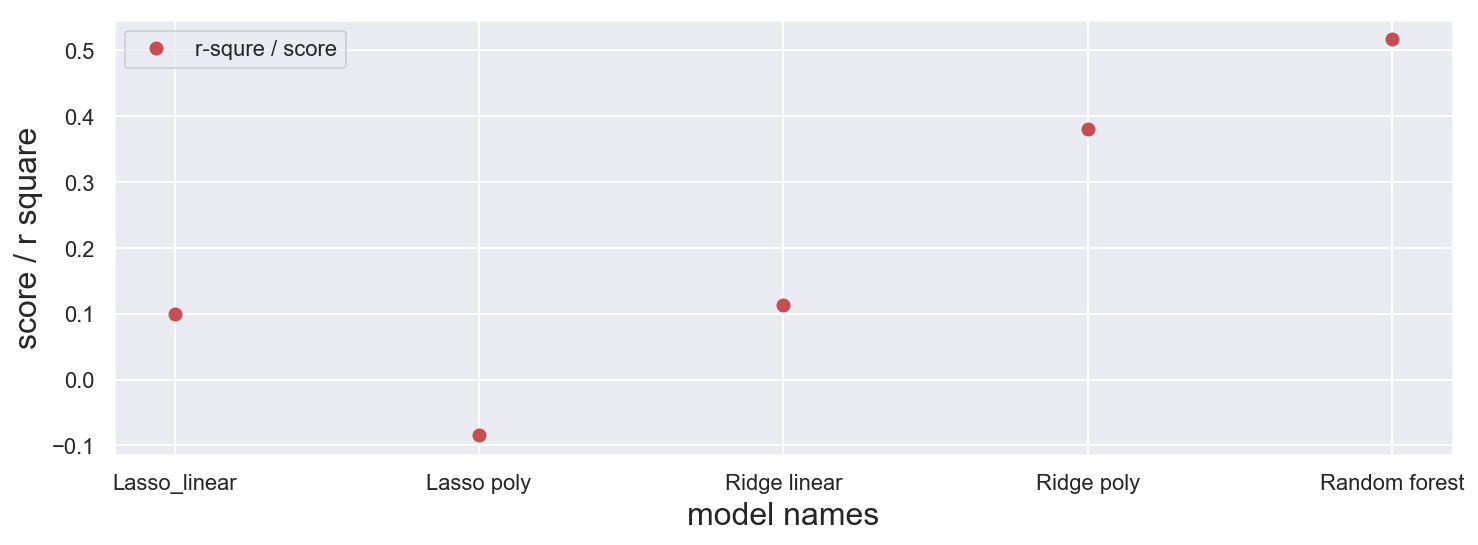

In [139]:
plt.figure(1)
plt.plot(model_lst, lst_score, 'ro')
plt.legend(loc = 9)
plt.legend(['r-squre / score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r square', fontsize =16)
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


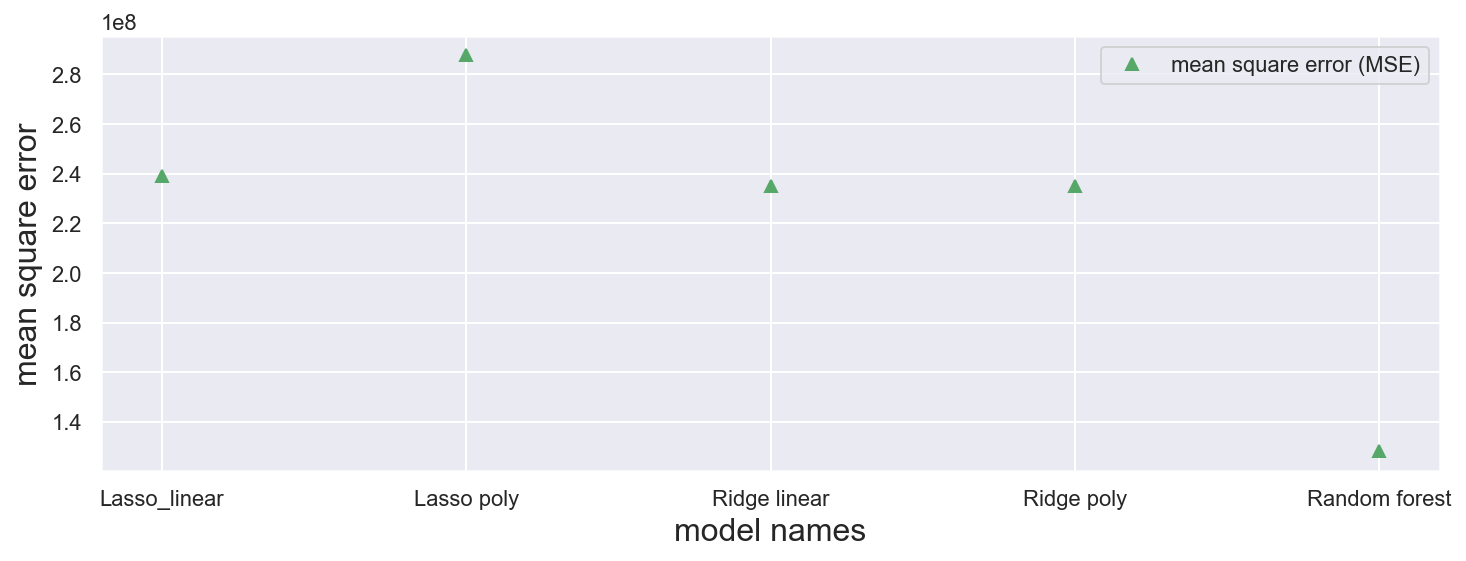

In [140]:
plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(loc = 9)
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


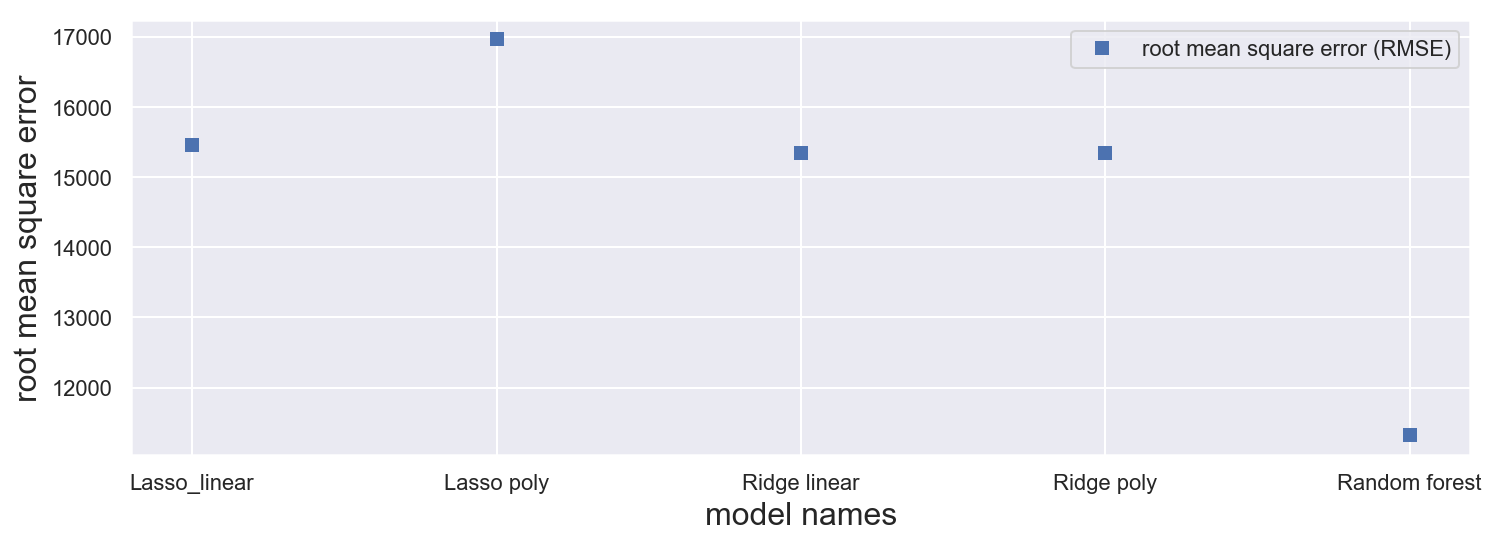

In [141]:
plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bs')
plt.legend(loc = 9)
plt.legend(['root mean square error (RMSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True)
plt.show()

# Part 5. Feature importance

Random forest(RF) shows the best prediction accuracy. 
Therefore, the feature importance will be extracted from the RF model. 

In [144]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_name = test_x.columns.get_values()

# Print the feature ranking
print("Feature importance ranking:")
for f in range(test_x.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f],  feature_name[f], importances[indices[f]]))

Feature importance ranking:
1. feature 0 weighted_categorical_position (0.151490)
2. feature 2 weighted_horizontal_poition (0.133391)
3. feature 1 imdb_votes (0.112314)
4. feature 3 budget (0.070595)
5. feature 7 boxoffice (0.060027)
6. feature 8 imdb_rating (0.051750)
7. feature 4 duration_in_mins (0.051296)
8. feature 6 metacritic_score (0.039816)
9. feature 9 star_category (0.036208)
10. feature 11 lionsgate (0.030517)
11. feature 5 mgm (0.027920)
12. feature 10 other (0.019769)
13. feature 53 paramount (0.019051)
14. feature 52 G (0.015720)
15. feature 18 NC-17 (0.013947)
16. feature 28 NotRated (0.013426)
17. feature 49 PG (0.010542)
18. feature 23 PG-13 (0.009500)
19. feature 42 R (0.009128)
20. feature 22 BAFTA (0.007116)
21. feature 38 Golden Globe (0.006958)
22. feature 30 Oscar (0.006782)
23. feature 27 no award (0.006641)
24. feature 50 other award (0.006127)
25. feature 15 Action (0.005960)
26. feature 48 Adventure (0.005511)
27. feature 17 Animation (0.005243)
28. feature 

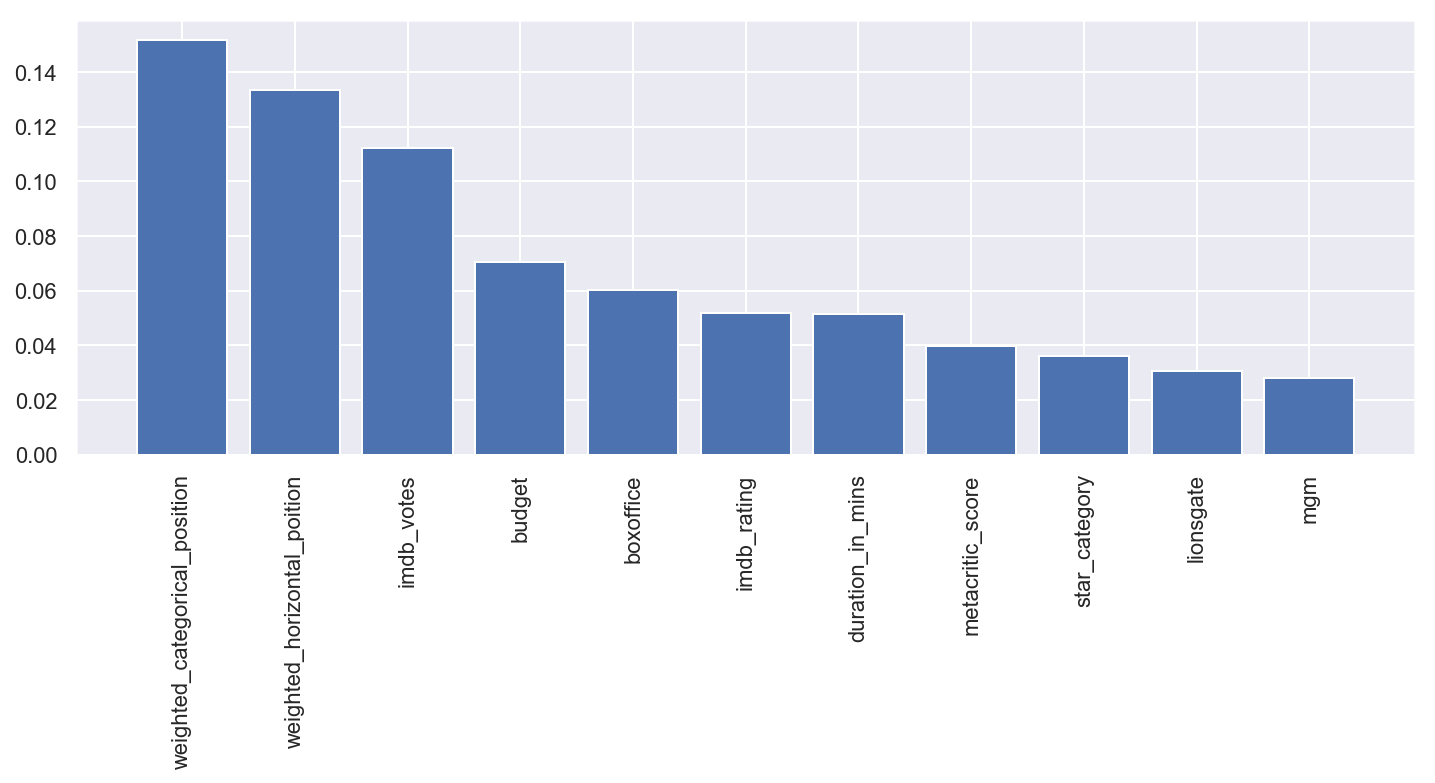

In [145]:
plt.figure(1)
plt.bar(feature_name[:11], importances[indices[:11]])
plt.xticks(rotation=90)
plt.show()